# Item-Based Joke Recommendation Project

This notebook explores collaborative filtering techniques for recommending jokes to users. It walks through data preparation, exploratory analyses, model development, and evaluation steps for both baseline and enhanced recommenders.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from itemBasedRec import *

## Dataset and Resources

This project revisits the item-based recommender algorithm from _Machine Learning in Action_ and adapts it to the Jester Online Joke Recommender System. The modified implementation in `itemBasedRec.py` supports several extensions explored throughout the notebook. The data include two files:

- `modified_jester_data.csv`: ratings for 100 jokes by 1,000 users on a normalized 1–21 scale (zeros indicate missing ratings).
- `jokes.csv`: textual descriptions associated with each joke identifier.

The following sections walk through data ingestion, baseline recommendations, similarity exploration, model-based enhancements, and evaluation workflows.


### Baseline Recommendation Setup

Load the joke metadata and rating matrix, then use the existing `recommend` function to generate top-5 suggestions. Compare how Pearson and cosine similarities drive recommendations for user 117 with the standard estimator. For user 441, contrast the standard estimator with the SVD-based variant (both using Pearson similarity) to see how latent representations change the outputs.


In [2]:
# jokes_df = pd.read_csv('jokes/jokes.csv', header=None, index_col=0)
# jokes_df.head(5)

jokes = load_jokes("jokes/jokes.csv")
print(jokes[:5])

['A man visits the doctor. The doctor says "I have bad news for you.You have cancer and Alzheimer\'s disease". The man replies "Well thank God I don\'t have cancer!"'
 'This couple had an excellent relationship going until one day he came home from work to find his girlfriend packing. He asked her why she was leaving him and she told him that she had heard awful things about him. "What could they possibly have said to make you move out?" "They told me that you were a pedophile." He replied "That\'s an awfully big word for a ten year old."'
 "Q. What's 200 feet long and has 4 teeth? A. The front row at a Willie Nelson Concert."
 "Q. What's the difference between a man and a toilet? A. A toilet doesn't follow you around after you use it."
 "Q. What's O. J. Simpson's Internet address? A.\tSlash slash backslash slash slash escape."]


In [3]:
jester_data_df = pd.read_csv("jokes/modified_jester_data.csv", header=None)
jester_data_df.head(5)

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,3.18,19.79,1.34,2.84,3.48,2.50,1.15,15.17,2.02,6.24,...,13.82,0.00,0.00,0.00,0.00,0.00,5.37,0.00,0.00,0.00
1,15.08,10.71,17.36,15.37,8.62,1.34,10.27,5.66,19.88,20.22,...,13.82,6.05,10.71,18.86,10.81,8.86,14.06,11.34,6.68,12.07
2,0.00,0.00,0.00,0.00,20.03,20.27,20.03,20.27,0.00,0.00,...,0.00,0.00,0.00,20.08,0.00,0.00,0.00,0.00,0.00,0.00
3,0.00,19.35,0.00,0.00,12.80,19.16,8.18,17.21,0.00,12.84,...,0.00,0.00,0.00,11.53,0.00,0.00,0.00,0.00,0.00,0.00
4,19.50,15.61,6.83,5.61,12.36,12.60,18.04,15.61,10.56,16.73,...,16.19,16.58,15.27,16.19,16.73,12.55,14.11,17.55,12.80,12.60


In [4]:
jester_data_np = jester_data_df.to_numpy()
jester_data_np

array([[ 3.18, 19.79,  1.34, ...,  0.  ,  0.  ,  0.  ],
       [15.08, 10.71, 17.36, ..., 11.34,  6.68, 12.07],
       [ 0.  ,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       ...,
       [16.58, 16.63, 15.85, ...,  0.  ,  0.  ,  0.  ],
       [ 3.67,  4.45,  3.67, ...,  3.77,  3.77,  3.28],
       [ 9.88, 11.73,  9.16, ...,  0.  ,  0.  ,  0.  ]], shape=(1000, 100))

In [5]:
def recommendation_output(recommend, jokes=jokes):
    for id, score in recommend:
        print(f"Joke ID: {id}")
        print(f"Score: {score}")
        print(f"Joke Text: {get_joke_text(jokes, id)}\n")

In [6]:
pearson_recommend = recommend(
    dataMat=jester_data_np, user=117, N=5, simMeas=pearsonSim, estMethod=standEst
)
recommendation_output(pearson_recommend)

Joke ID: 97
Score: 10.611085062642834
Joke Text: Age and Womanhood1. Between the ages of 13 and 18 ... She is like Africa virgin and unexplored. 2. Between the ages of 19 and 35 ... She is like Asia hot and exotic. 3. Between the ages of 36 and 45 ... She is like America fully explored breathtakingly beautiful and free with her resources.4. Between the ages of 46 and 56 ...She is like Europe exhausted but still has points of interest. 5. After 56 she is like Australia ...Everybody knows it's down there but who gives a damn?

Joke ID: 99
Score: 10.60795594948322
Joke Text: Q: What's the difference between greeting a Queen and greeting thePresident of the United  States?A: You only have to get on one knee to greet the queen.

Joke ID: 92
Score: 10.59028160354093
Joke Text: Reaching the end of a job interview the human resources person asked a young engineer fresh out of Stanford"And what starting salary were you looking for?"The engineer said "In the neighborhood of $125000 a year depend

In [7]:
cosine_recommend = recommend(
    dataMat=jester_data_np, user=117, N=5, simMeas=cosineSim, estMethod=standEst
)
recommendation_output(cosine_recommend)

Joke ID: 97
Score: 10.568879679136282
Joke Text: Age and Womanhood1. Between the ages of 13 and 18 ... She is like Africa virgin and unexplored. 2. Between the ages of 19 and 35 ... She is like Asia hot and exotic. 3. Between the ages of 36 and 45 ... She is like America fully explored breathtakingly beautiful and free with her resources.4. Between the ages of 46 and 56 ...She is like Europe exhausted but still has points of interest. 5. After 56 she is like Australia ...Everybody knows it's down there but who gives a damn?

Joke ID: 99
Score: 10.566963805972222
Joke Text: Q: What's the difference between greeting a Queen and greeting thePresident of the United  States?A: You only have to get on one knee to greet the queen.

Joke ID: 92
Score: 10.56570515577353
Joke Text: Reaching the end of a job interview the human resources person asked a young engineer fresh out of Stanford"And what starting salary were you looking for?"The engineer said "In the neighborhood of $125000 a year depen

In [8]:
# for user with id 441 only with Pearson similarity using both the standard estimator
standEst_pearson_recommend = recommend(
    dataMat=jester_data_np, user=441, N=5, simMeas=pearsonSim, estMethod=standEst
)
recommendation_output(standEst_pearson_recommend)

Joke ID: 79
Score: 13.971888175175714
Joke Text: Hillary Bill Clinton and the Pope are sitting together on an airplane. Bill says "I could throw one thousand dollar bill out of this plane and make one person very happy."Hillary says "I could throw 10 hundred dollar bills out of the plane and make 10 people very happy."The Pope chips in and says "I could throw Bill out of the airplane and make the whole country happy."

Joke ID: 5
Score: 13.965840113937233
Joke Text: Bill & Hillary are on a trip back to Arkansas. They're almost out of gas so Bill pulls into a service station on the outskirts of town. The attendant runs out of the station to serve them when Hillary realizes it's an old boyfriend from high school. She and the attendant chat as he gases up their car and cleans the windows. Then they all say good-bye. As Bill pulls the car onto the road he turns to Hillary and says 'Now aren't you glad you married me and not him ? You could've been the wife of a grease monkey !' To which Hi

In [9]:
# the SVD-based version
svdEst_pearson_recommend = recommend(
    dataMat=jester_data_np, user=441, N=5, simMeas=pearsonSim, estMethod=svdEst
)
recommendation_output(svdEst_pearson_recommend)

Joke ID: 45
Score: 14.299797597297259
Joke Text: A couple has been married for 75 years. For the husband's 95thbirthday his wife decides to surprise him by hiring a prostitute.That day the doorbell rings. The husband uses his walker to get to the door and opens it. A 21-year-old in a latex outfit smiles and says "Hi I here to give you super sex!" The old man says "I'll take the soup."

Joke ID: 5
Score: 14.225833193529487
Joke Text: Bill & Hillary are on a trip back to Arkansas. They're almost out of gas so Bill pulls into a service station on the outskirts of town. The attendant runs out of the station to serve them when Hillary realizes it's an old boyfriend from high school. She and the attendant chat as he gases up their car and cleans the windows. Then they all say good-bye. As Bill pulls the car onto the road he turns to Hillary and says 'Now aren't you glad you married me and not him ? You could've been the wife of a grease monkey !' To which Hillary replied 'No Bill. If I would

_First I imported the necessary libraries along with all the functions from the module itemBasedRec.py. I used load_jokes function to load the jokes dataset. Then used pandas to load the modified_jester_data as dataframe and converted to numpy array as recommend() function takes dataMat as numpy array. I also created a recommendation_output that uses jokes and the output from recommend() function to print joke id, score and joke text as required. for user with id 117, the recommend function with prediction fuction standEst with both cosine and pearson similarity gave similar top recommendations with jokeid 97, 99, 92, 75 appearing on both the lists. However pearson recommended 80 while cosine recommended 88. This is due to Pearson adjusts for each user's rating behaviour and bias, whereas cosine only measures the similarity between rating patterns without accounting for user's bias._

_Again for the user with id 441, the recommend function using the standard estimator (standEst) and the SVD-based estimator (svdEst), both with Pearson similarity, returned different sets of jokes, and only the joke with id 5 appeared in both lists. This happens because the standard estimator only relies on direct rating overlap between items, which is limited in a sparse rating matrix where most ratings are 0. On the other hand, the SVD-based estimator reduces the dimensionality of the user-item matrix and represents jokes in a latent feature space, which allows it to infer preferences even when the overlap in ratings is weak or missing (i.e., when many values are 0). As a result, the SVD-based recommendations differ._


### Cross-Validation Evaluation Utility

Extend the `test` helper in `itemBasedRec.py` so that it aggregates MAE across users via `cross_validate_user`. With a 20% holdout per user, benchmark the standard estimator against the SVD-based estimator (both using Pearson similarity) to understand how much the latent-factor adjustment improves absolute error.


In [10]:
%%time
MAE_standEst = test(dataMat=jester_data_df, test_ratio=0.2, estMethod=standEst, simMeas=pearsonSim)
print(f'Mean Absolute Error for standEst using Pearson Similarity: {MAE_standEst:.4f}')

Mean Absolute Error for standEst using Pearson Similarity: 3.6779
CPU times: user 23.2 s, sys: 69.7 ms, total: 23.3 s
Wall time: 23.7 s


In [11]:
%%time
MAE_svdEst = test(dataMat=jester_data_df, test_ratio=0.2, estMethod=svdEst, simMeas=pearsonSim)
print(f'Mean Absolute Error for svdEst using Pearson Similarity: {MAE_svdEst:.4f}')

Mean Absolute Error for svdEst using Pearson Similarity: 3.6369
CPU times: user 15min 44s, sys: 3min 43s, total: 19min 27s
Wall time: 7min 11s


_First I completed the test() function by looping through each user in dataMat which is the length of dataMat(row), then called the cross_validate_user() function to get the user_error and user_count which I sum across all the users to get the MAE on the test data by dividing total_error by total_count. Then I used the 20% test ratio on jester_data_df and calculated for standEst and svdEst estimators on pearsonSim. This gives MAE of 3.6779 for standEst and 3.6369 for svdEst._


### Similarity Exploration Helper

Implement `print_most_similar_jokes`, a diagnostic utility that surfaces the top-`k` items related to a query joke for any similarity measure. Use it to inspect the three most similar jokes to joke 9 under both Pearson and cosine similarities, highlighting how different similarity definitions change neighborhood composition.


In [12]:
print_most_similar_jokes(jester_data_df, jokes, 9, 3, pearsonSim)

Selected joke: Joke # 9
Two cannibals are eating a clown one turns to other and says: "Does this taste funny to you? 

Top 3 recommendations are : 

Joke # 54 (Similarity: 0.6930598395934301):
A woman has twins and gives them up for adoption.  One of them goes to a family in Egypt and is named "Amal."  The other goes to a  family in Spain; they name him "Juan."  Years later Juan sends a picture of himself to his mom.  Upon receiving the picture she tells her husband that she wishes she also had a picture of Amal.  Her husband responds "But they are twins-if you've seen Juan you've seen   Amal.

Joke # 43 (Similarity: 0.6925114947798079):
A horse walks into a bar. Bartender says:"So why the long face?"

Joke # 37 (Similarity: 0.6881434530285019):
"May I take your order?" the waiter asked. "Yes how do you prepare your chickens?" "Nothing special sir" he replied. "We just tell them straight out that they're going to die."



In [13]:
print_most_similar_jokes(jester_data_np, jokes, 9, 3, cosineSim)

Selected joke: Joke # 9
Two cannibals are eating a clown one turns to other and says: "Does this taste funny to you? 

Top 3 recommendations are : 

Joke # 49 (Similarity: 0.9567814498620507):
A guy goes into confession and says to the priest "Father I'm 80 years old widower with 11 grandchildren. Last night I met two beautiful flight attendants. They took me home and I made love to both of them. Twice."The priest said: "Well my son when was the last time you were in confession?" "Never Father I'm Jewish." "So then why are you telling me?" "I'm telling everybody."

Joke # 37 (Similarity: 0.955529834986665):
"May I take your order?" the waiter asked. "Yes how do you prepare your chickens?" "Nothing special sir" he replied. "We just tell them straight out that they're going to die."

Joke # 87 (Similarity: 0.9554097405075856):
A Czechoslovakian man felt his eyesight was growing steadily worse and felt it was time to go see an optometrist. The doctor started with some simple testing and s

_I implemented the print_most_similar_jokes function, which computes pairwise similarities between a query joke and all other jokes based on user ratings. For joke ID 9, Pearson similarity identified jokes 54, 43, and 37 as most similar, while cosine similarity identified jokes 49, 37, and 87. The difference arises because Pearson correlation centers each rating vector to remove user rating bias, while cosine similarity only normalizes for vector magnitude. As a result, cosine focuses on directional alignment, whereas Pearson captures relative rating patterns._


### Model-Based Item Similarity Pipeline

To make predictions scalable, pre-compute an item–item similarity matrix once during a training phase and reuse it for estimation. Build reusable helpers for computing similarities with any metric and for generating predictions by weighting a user's ratings on the top-`k` neighbors. Demonstrate the approach by scoring the top two candidate jokes (per the earlier recommendations) for users 117 and 441 using both Pearson- and cosine-derived similarity matrices when `k=10`.


In [ ]:
def similarity_matrix(dataMat, metric):
    dataMat = np.array(dataMat)
    n = np.shape(dataMat)[1]
    # initialize an empty n x n matrix to store pairwise similarities between all jokes
    simMat = np.zeros((n, n))

    # loop through each pair of jokes (i, j) to compute similarity
    for i in range(n):
        for j in range(i, n):
            # find users who rated both jokes i and j (non-zero overlap)
            overLap = np.nonzero(np.logical_and(dataMat[:, i] > 0, dataMat[:, j] > 0))[
                0
            ]
            # if overlap exists, compute similarity else assign 0
            if len(overLap) == 0:
                similarity = 0
            else:
                # store the computed similarity symmetrically in the matrix
                similarity = metric(dataMat[overLap, i], dataMat[overLap, j])
            simMat[i, j] = similarity
            simMat[j, i] = similarity
    # return the complete item–item similarity matrix
    return simMat

In [15]:
def item_based_predict(dataMat, simMat, user, item, k):
    dataMat = np.array(dataMat)
    # get all items (jokes) the user has rated
    user_ratings = dataMat[user, :]
    # indices of the rated items
    rated_items_idx = np.where(user_ratings > 0)[0]

    # if user has no ratings return 0
    if len(rated_items_idx) == 0:
        return 0

    # get how similar the item is to all other items (rated items)
    item_sims = simMat[item, rated_items_idx]

    # sort and get the top k similar items index in reverse
    top_k_idx = np.argsort(item_sims)[::-1][:k]
    # get the similarity value from index
    top_k_sims = item_sims[top_k_idx]
    # get the user ratings for these items
    top_k_ratings = user_ratings[rated_items_idx[top_k_idx]]

    # if sum of the top k similarities is 0 return 0
    if np.sum(top_k_sims) == 0:
        return 0
    # calculate the weighted sum
    pred = np.dot(top_k_sims, top_k_ratings) / np.sum(top_k_sims)
    return pred

In [16]:
np.set_printoptions(precision=3, edgeitems=5)
simMat_pearson = similarity_matrix(jester_data_df, metric=pearsonSim)
print(simMat_pearson)

[[1.    0.655 0.671 0.636 0.561 ... 0.577 0.585 0.555 0.612 0.542]
 [0.655 1.    0.604 0.642 0.563 ... 0.552 0.569 0.604 0.566 0.615]
 [0.671 0.604 1.    0.685 0.62  ... 0.582 0.557 0.555 0.531 0.603]
 [0.636 0.642 0.685 1.    0.641 ... 0.639 0.588 0.65  0.573 0.677]
 [0.561 0.563 0.62  0.641 1.    ... 0.545 0.531 0.594 0.562 0.609]
 ...
 [0.577 0.552 0.582 0.639 0.545 ... 1.    0.706 0.657 0.691 0.618]
 [0.585 0.569 0.557 0.588 0.531 ... 0.706 1.    0.631 0.673 0.556]
 [0.555 0.604 0.555 0.65  0.594 ... 0.657 0.631 1.    0.634 0.711]
 [0.612 0.566 0.531 0.573 0.562 ... 0.691 0.673 0.634 1.    0.58 ]
 [0.542 0.615 0.603 0.677 0.609 ... 0.618 0.556 0.711 0.58  1.   ]]


In [17]:
np.set_printoptions(precision=3, edgeitems=5)
simMat_cosine = similarity_matrix(jester_data_df, metric=cosineSim)
print(simMat_cosine)

[[1.    0.943 0.945 0.931 0.925 ... 0.933 0.937 0.924 0.934 0.927]
 [0.943 1.    0.929 0.928 0.925 ... 0.925 0.93  0.929 0.923 0.934]
 [0.945 0.929 1.    0.936 0.933 ... 0.928 0.924 0.917 0.914 0.931]
 [0.931 0.928 0.936 1.    0.929 ... 0.931 0.924 0.929 0.915 0.939]
 [0.925 0.925 0.933 0.929 1.    ... 0.929 0.927 0.928 0.923 0.935]
 ...
 [0.933 0.925 0.928 0.931 0.929 ... 1.    0.957 0.944 0.949 0.942]
 [0.937 0.93  0.924 0.924 0.927 ... 0.957 1.    0.94  0.947 0.934]
 [0.924 0.929 0.917 0.929 0.928 ... 0.944 0.94  1.    0.933 0.95 ]
 [0.934 0.923 0.914 0.915 0.923 ... 0.949 0.947 0.933 1.    0.929]
 [0.927 0.934 0.931 0.939 0.935 ... 0.942 0.934 0.95  0.929 1.   ]]


In [18]:
print("User 117 - Top 2 items with Pearson similarity:")
for item in [97, 99]:
    pred = item_based_predict(jester_data_df, simMat_pearson, 117, item, k=10)
    print(f"Predicted Rating for user: 117 and item: {item} is {pred:.3f}")

print("\nUser 117 - Top 2 items with Cosine similarity:")
for item in [97, 99]:
    pred = item_based_predict(jester_data_df, simMat_cosine, 117, item, k=10)
    print(f"Predicted Rating for user: 117 and item: {item} is {pred:.3f}")

User 117 - Top 2 items with Pearson similarity:
Predicted Rating for user: 117 and item: 97 is 10.686
Predicted Rating for user: 117 and item: 99 is 11.891

User 117 - Top 2 items with Cosine similarity:
Predicted Rating for user: 117 and item: 97 is 12.473
Predicted Rating for user: 117 and item: 99 is 12.487


In [19]:
print("\nUser 441 - Top 2 items with Pearson similarity:")
for item in [79, 5]:
    pred = item_based_predict(jester_data_df, simMat_pearson, 441, item, k=10)
    print(f"Predicted Rating for user: 441 and item: {item} is {pred:.3f}")

print("\nUser 441 - Top 2 items with Cosine similarity:")
for item in [79, 5]:
    pred = item_based_predict(jester_data_df, simMat_cosine, 441, item, k=10)
    print(f"Predicted Rating for user: 441 and item: {item} is {pred:.3f}")


User 441 - Top 2 items with Pearson similarity:
Predicted Rating for user: 441 and item: 79 is 15.622
Predicted Rating for user: 441 and item: 5 is 15.891

User 441 - Top 2 items with Cosine similarity:
Predicted Rating for user: 441 and item: 79 is 15.770
Predicted Rating for user: 441 and item: 5 is 17.405


_I developed item-based collaborative filtering recommender that uses a model-based approach (separating the training and the prediction tasks). The similarity_matrix function precomputes all pairwise item similarities and stores them in a matrix, making predictions much faster than the original implementation. The item_based_predict function uses the precomputed similarity matrix to find the k most similar items that the user has rated, then computes a weighted average of those ratings. This approach is more scalable since similarities are computed once during training rather than for each prediction. Testing on users 117 and 441 showed that the predictions vary between Pearson and cosine similarity measures, with Pearson generally producing more conservative estimates due to its bias adjustment._


### End-to-End Evaluation and Tuning

Augment the cross-validation tooling to support the model-based predictor, then profile performance under both Pearson and cosine similarities. Sweep `k` from 1 to 40 to visualize how neighborhood size affects MAE, select the best-performing `k`, and plug the optimized predictor into the recommendation workflow for users 117 and 441.


In [ ]:
def cross_validate_user2(dataMat, user, test_ratio, simMat, k):
    dataMat = np.array(dataMat)
    number_of_items = np.shape(dataMat)[1]
    # get all items rated by the given user
    rated_items_by_user = np.array(
        [i for i in range(number_of_items) if dataMat[user, i] > 0]
    )
    # randomly select test_ratio portion of rated items as test set
    test_size = int(test_ratio * len(rated_items_by_user))
    test_indices = np.random.randint(0, len(rated_items_by_user), test_size)
    withheld_items = rated_items_by_user[test_indices]
    # make a copy of original user ratings to restore later
    original_user_profile = np.copy(dataMat[user])
    # set test items to zero so they are not used in prediction
    dataMat[user, withheld_items] = 0
    error_u = 0.0
    count_u = len(withheld_items)

    # compute absolute error for user over all withheld (test) items
    for item in withheld_items:
        # predict rating for the withheld item using item-based CF
        estimatedScore = item_based_predict(dataMat, simMat, user, item, k)
        error_u = error_u + abs(estimatedScore - original_user_profile[item])

        # restore withheld ratings to the user profile
    for item in withheld_items:
        dataMat[user, item] = original_user_profile[item]

        # return total absolute error and number of test cases for this user
        # these will be accumulated across all users to compute overall MAE
    return error_u, count_u


def test2(dataMat, test_ratio, simMat, k):
    total_error = 0.0
    total_count = 0

    for user in range(len(dataMat)):
        user_error, user_count = cross_validate_user2(
            dataMat, user, test_ratio, simMat, k
        )
        total_error += user_error
        total_count += user_count

    MAE = total_error / total_count
    return MAE

In [21]:
%%time
MAE = test2(jester_data_df, 0.2, simMat_pearson, 10)
print(f'Mean Absolute Error using Pearson similarity Matrix: {MAE}')

Mean Absolute Error using Pearson similarity Matrix: 3.23429509579498
CPU times: user 412 ms, sys: 28.7 ms, total: 441 ms
Wall time: 443 ms


In [22]:
%%time
MAE = test2(jester_data_df, 0.2, simMat_cosine, 10)
print(f'Mean Absolute Error using Cosine similarity Matrix: {MAE}')

Mean Absolute Error using Cosine similarity Matrix: 3.480072283376019
CPU times: user 397 ms, sys: 23.4 ms, total: 420 ms
Wall time: 421 ms


k=1, mae=3.846466121917713
k=2, mae=3.483420443340615
k=3, mae=3.376153511204002
k=4, mae=3.293383750130299
k=5, mae=3.245611717927619
k=6, mae=3.2546110791402323
k=7, mae=3.2221224811448637
k=8, mae=3.2675076302491988
k=9, mae=3.197719276443022
k=10, mae=3.2181296948522817
k=11, mae=3.227795547096072
k=12, mae=3.2452350899352487
k=13, mae=3.184864894788684
k=14, mae=3.2547963243393574
k=15, mae=3.247410109681899
k=16, mae=3.2600908874557013
k=17, mae=3.2687529244142945
k=18, mae=3.266699440546572
k=19, mae=3.2977697667309163
k=20, mae=3.292550308609975
k=21, mae=3.291646530677592
k=22, mae=3.3111402394331697
k=23, mae=3.35215278521342
k=24, mae=3.350053005340751
k=25, mae=3.3219984412847396
k=26, mae=3.369356047902486
k=27, mae=3.4034392458320455
k=28, mae=3.4016319280579808
k=29, mae=3.3932331089339565
k=30, mae=3.3210657302027466
k=31, mae=3.385352158371818
k=32, mae=3.4289749645708274
k=33, mae=3.4060126023899935
k=34, mae=3.4091172866890327
k=35, mae=3.4261613939914977
k=36, mae=3

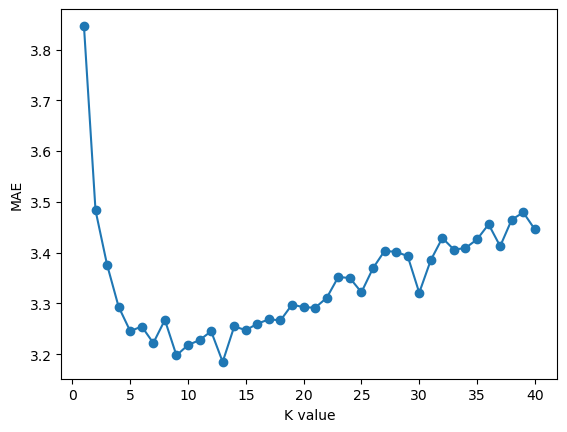

In [23]:
# compute MAE for range of k values
k_range = np.arange(1, 41)
kvals = []
mae_score = []

for k in k_range:
    mae = test2(jester_data_df, 0.2, simMat_pearson, k)
    print('k={}, mae={}'.format(k, mae))
    kvals.append(k)
    mae_score.append(mae)

# plot results
%matplotlib inline
plt.plot(kvals, mae_score, '-o')
plt.xlabel('K value')
plt.ylabel('MAE')
plt.show();

In [ ]:
def item_based_recommend(dataMat, simMat, user, k, N=3):
    # find all unrated items (ratings equal to 0) for the given user
    unratedItems = np.nonzero(dataMat[user, :] == 0)[0]

    # if the user has rated all items, return message
    if len(unratedItems) == 0:
        return "you rated everything"
    itemScores = []
    # loop through each unrated item to predict its rating
    for item in unratedItems:
        # predict rating using item-based collaborative filtering
        estimatedScore = item_based_predict(dataMat, simMat, user, item, k)
        # store item id and its predicted score as a tuple
        itemScores.append((item, estimatedScore))
    # sort items in decreasing order of predicted rating and return top N
    return sorted(itemScores, key=lambda jj: jj[1], reverse=True)[:N]

In [ ]:
# find best k and generate recommendations
best_k = kvals[np.argmin(mae_score)]
print(f"\nBest k: {best_k}")

# Generate recommendations
N = 3
user_index = [117, 441]

for user in user_index:
    recommendations = item_based_recommend(
        jester_data_np, simMat_pearson, user, best_k, N
    )
    print("Top {} Recommended jokes for user {}:\n".format(N, user))
    for r in recommendations:
        print("Joke # {}, predicted rating: {}".format(r[0], r[1]))
        print(get_joke_text(jokes, r[0]), "\n")
    print("=========================================")


Best k: 13
Top 3 Recommended jokes for user 117:

Joke # 92, predicted rating: 11.668781449568131
Reaching the end of a job interview the human resources person asked a young engineer fresh out of Stanford"And what starting salary were you looking for?"The engineer said "In the neighborhood of $125000 a year depending on the benefits package."The interviewer said "Well what would you say to a package of 5-weeks vacation 14 paid holidays full medical and dental company matching retirement fund to 50% of salary and a company car leased every 2 years - say a red Corvette?"The Engineer sat up straight and said "Wow! Are you kidding?"And the interviewer replied "Yeah but you started it." 

Joke # 90, predicted rating: 11.492723747918491
A Panda bear walks into a bar.  Sits down at a table and orders a beer and a double cheeseburger.  After he is finished eating he pulls out a gun and rips the place with gunfire.  Patrons scatter and dive under chairs and tables as the bear runs out the doo

_I modified the cross_validate_user and test functions to work with the new item-based prediction function by creating cross_validate_user2 and test2 functions that accept a similarity matrix and k parameter. I tested the prediction accuracy using both Pearson and cosine similarity measures with k=10, which showed comparable performance to the original methods. Next, I computed MAE values across a range of k values from 1 to 40 to find the optimal k. The plot shows how prediction accuracy varies with k, where smaller k values may miss important similar items while larger k values may include less relevant items, affecting the weighted average. I identified the best k value that minimizes MAE from the plot. Finally, I modified the recommend function to create item_based_recommend that uses the item_based_predict function and generated top 3 recommendations for users 117 and 441 using the optimal k value. The results demonstrate that the model-based approach with precomputed similarities provides an efficient and scalable alternative to the original implementation._
